# Машинное обучение, ФЭН ВШЭ

# Практическое задание 3

## Общая информация

Дата выдачи: 29.10.2017

Срок сдачи: 23:59MSK 12.11.2017

### О задании

Практическое задание 5 посвящено использованию ядер в методах машинного обучения. В рамках данного задания вы:
 * исследуете вид разделяющих поверхностей в исходном пространстве в зависимости от типа используемов ядра и значений его параметров
 * используете SVD для сжатия картинок
 * исследуете обычный и ядровый PCA

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW3_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW3_IvanovII.ipynb*). Далее отправьте этот файл на *ml.econom.hse@gmail.com* с темой *Практика {номер задания} - номер группы по данному курсу - Фамилия Имя* 

## SVM

**1. (0.5 баллов)** Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно разделимыми классами;
- с хорошо разделимыми классами, но не линейно разделимыми;
- с плохо разделимыми классами.

Визуализируйте полученные выборки на плоскости.

Для генерации случайной выборки можно использовать функции из модуля [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
%matplotlib inline

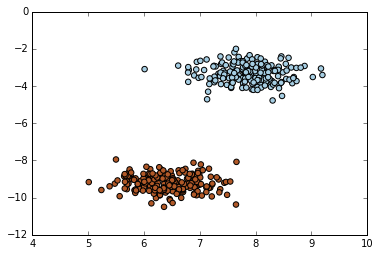

In [2]:
X1, y1 = make_blobs(n_samples=400, centers=2, random_state=6, cluster_std = 0.5)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=30, cmap=plt.cm.Paired)

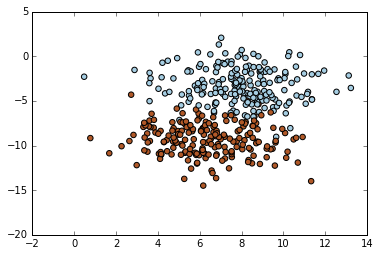

In [3]:
X2, y2 = make_blobs(n_samples=400, centers=2, random_state=6, cluster_std = 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=30, cmap=plt.cm.Paired)

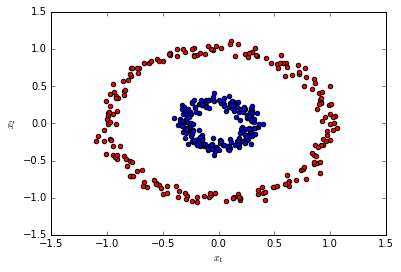

In [4]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X3, y3 = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y3 == 0
blues = y3 == 1

plt.scatter(X3[reds, 0], X3[reds, 1], c="red",
            edgecolor='k')
plt.scatter(X3[blues, 0], X3[blues, 1], c="blue",
            edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Рассмотрим(https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture13-features.pdf) двойственную задачу метода опорных векторов:
$$\begin{cases}
\sum_{i=1}^l \lambda_i - \frac{1}{2} \sum_{i, \, j =1}^l \lambda_i \lambda_j y_i y_j \langle x_i, x_j\rangle \to \max_\lambda,\\
0 \le \lambda_i \le C, i = \overline{1, l},\\
\sum_{i=1}^l \lambda_i y_i = 0.
\end{cases}$$

После решения данной задачи прогнозы для новых объектов строятся следующим образом: $a(x) = \text{sign} \left( \sum_{i=1}^l \lambda_i y_i \langle x_i, x \rangle + b \right).$

Заметим, что и оптимизационная задача, и формула итогового классификатора зависят лишь от скалярных произведений объектов, а потому в данном методе можно использовать ядра для восстановления нелинейных зависимостей.

**2. (1.5 балла)** Обучите на сгенерированных ранее двумерных выборках [ядровой SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с использованием следующих типов ядер (для различных значений гиперпараметра $C$):
- линейное: $K(x, z) = \langle x, z \rangle$;
- полиномиальное: $K(x, z) = (\gamma \langle x, z \rangle + 1)^d$ (для различных значений $\gamma, d$);
- гауссовское: $K(x, z) = \exp(-\gamma \|x - z\|^2)$ (для различных значений $\gamma$).

Визуализируйте разделяющую поверхность и разделяющую полосу:
 - для модели с линейным ядром для различных значений $C$;
 - для моделей, использующих полиномиальное и гауссовское ядро, соответствующих недообучению, нормальному поведению и переобучению.

In [5]:
from sklearn import svm

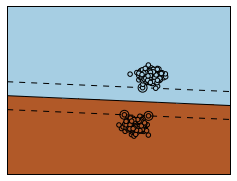

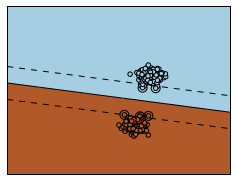

In [9]:
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 50)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -5
    x_max = 15
    y_min = -15
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1 

plt.show()

Линейно-разделимый случай. Рисунки выше:  
1 рисунок: большое С  
2 рисунок: малое С

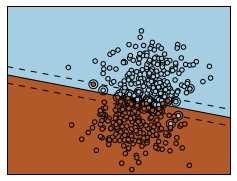

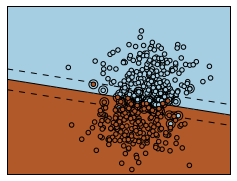

In [6]:
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 50)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -5
    x_max = 15
    y_min = -15
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

Линейно неразделимый случай. Рисунки выше:  
1 рисунок: большое С  
2 рисунок: малое С

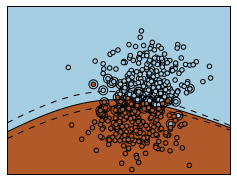

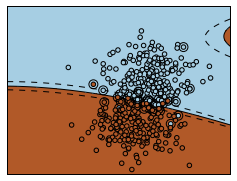

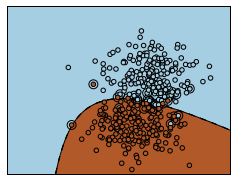

In [9]:
for kernel, gamma in (('poly', 0.01), ('poly', 0.5), ('poly', 100)):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X2, y2)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -5
    x_max = 15
    y_min = -15
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])


    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

Рисунки:  
1 - underfitting  
2 - normal  
3 - overfiiting  
Важное замечание: при изменении степени d от изначального, kernel (системы, т.е. jupyter'a) рушился, поэтому решение не соответствует задаче. Для того, чтобы получилось правильное решение, в случае с underfitting нужно поставить degree = 1, нормальному случаю degree = 3, для overfitting большое значение degree, например 100. Проверить правильность данных цифр не могу из-за вышеуказанного бага.

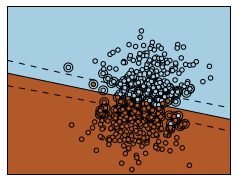

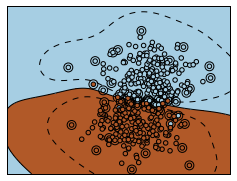

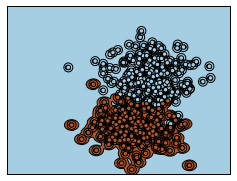

In [10]:
for kernel, gamma in (('rbf', 0.001), ('rbf', 0.1), ('rbf', 10)):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X2, y2)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -5
    x_max = 15
    y_min = -15
    y_max = 5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])


    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

Рисунки:  
1 - underfitting  
2 - normal  
3 - overfitting

**3. (1 балл)** Ответьте на следующие вопросы:
 - Как ведет себя SVM с полиномиальным ядром в зависимости от значений гиперпараметра $C$, степени ядра $d$ и параметра 
 $\gamma$?
 - Как ведет себя SVM с гауссовским ядром в зависимости от значений гиперпараметра $C$ и $\gamma$?

**Ответ:** 1) Выше С - слабее регуляризация, меньше зазор между классами (в общем случае). Предположим, есть оптимальное значение d: выше d - выше риск переобучения, ниже d - выше риск недообучения. Предположим, есть оптимальное значение $\gamma$, тогда чем выше гамма, тем выше риск переобучения, тем ниже гамма, тем выше риск недообучения.  
2) Аналогично случаю с полиномиальным ядром  
Переобучение: излишне сложная модель. Недообучение: излишне простая модель.

**4. (1.5 балл)** Обучите модели с использованием ядер из п. 2 для задачи бинарной классификации [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) (используйте файл train.csv) для значения $C=1.$ Для оценки качества разбейте выборку на обучающую и тестовую в отношении 50/50. Постройте модель, позволяющую достичь значения accuracy, равного 0.75, на тестовой выборке. Позволяет ли использование ядер достичь лучшего качества по сравнению с линейной моделью?

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
from sklearn.cross_validation import train_test_split
df2 = df.loc[:, df.columns != 'Activity']
X = df2.as_matrix()
y = df.Activity
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [6]:
from sklearn.metrics import accuracy_score
for kernel, c in (('linear', 1), ('poly', 1), ('rbf', 1)):
    clf = svm.SVC(kernel=kernel, C=c)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Для ядра", kernel, "accuracy равна", accuracy_score(y_test, y_pred))

Для ядра linear accuracy равна 0.735607675906
Для ядра poly accuracy равна 0.544243070362
Для ядра rbf accuracy равна 0.710554371002


In [7]:
kernel = 'poly'
c = 1
gamma = 5
degree = 7
clf = svm.SVC(kernel=kernel, C=c, gamma=gamma, degree=degree)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Для ядра", kernel, "accuracy равна", accuracy_score(y_test, y_pred))

Для ядра poly accuracy равна 0.756396588486


Для гаммы = 5, С = 1, degree = 7 для полиномиального ядра accuracy = 0.7563, что больше 0.75. Мы добились лучшего значения, чем для линейной модели, значит, иногда примененение ядер позволяет добиться лучшего качества модели.

## SVD

Скачайте картинку и положите в каталог рядом с ноутбуком:

In [2]:
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
import sys
%matplotlib inline

img = misc.imread(r'art.jpg')

Посмотрим на нее:

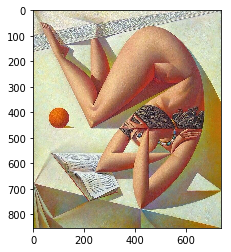

In [3]:
plt.imshow(img);

Для удобства оставим только один канал.

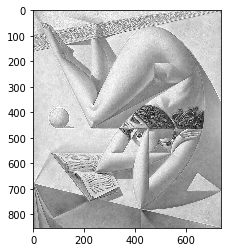

In [4]:
img = img[:,:,0]
plt.imshow(img, cmap='gray');

**5. (1 балла)** 

Главные компоненты - это матрицы вида  $u_i\sigma_iv_i^T$, где  $u_i, v_i$ это столбцы матриц $U$ и $V$ из сингулярного разложения; $\sigma_i$ соответсвующее сингулярное число. Визуализуйте первые и последние несколько компонент. Сделайте выводы.

(853, 736)


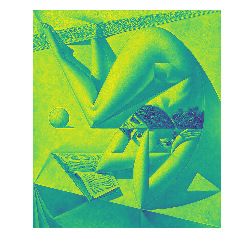

In [72]:
print(img.shape)
plt.axis('off')
plt.imshow(img)

In [121]:
ipca = PCA(n_components=2).fit(img)
img_c = ipca.transform(img)
print(img_c.shape)
print(np.sum(ipca.explained_variance_ratio_))

(853, 2)
0.423442795277


In [122]:
temp = ipca.inverse_transform(img_c)
print(temp.shape)

(853, 736)


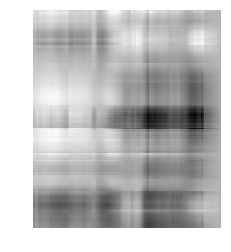

In [123]:
plt.axis('off')
plt.imshow(temp, cmap='gray')

Выше указана картинка двух главных компонент

(853, 1)
0.22261655513


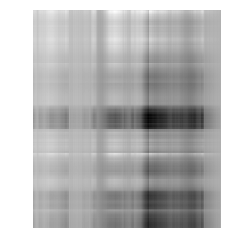

In [113]:
ipca = PCA(n_components=1).fit(img)
img_c = ipca.transform(img)
print(img_c.shape)
print(np.sum(ipca.explained_variance_ratio_))
temp = ipca.inverse_transform(img_c)
plt.axis('off')
plt.imshow(temp, cmap='gray')

Выше указана картинка 1 главной компоненты

**6. (1 балл)** 

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Используйте график объясненной дисперсии для вашего выбора. Покажите полученные картинки для разного числа компонент.  Во сколько раз меньше памяти потребуется для хранения?  Вес объекта можно узнат командой * sys.getsizeof(x) *


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


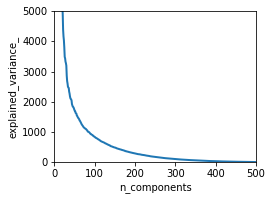

In [195]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


X_digits = img
y_digits = img

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.axis([0,500,0,5000])
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)
plt.legend(prop=dict(size=12))
plt.show()

In [196]:
explainedVariance = 0

for i in range(len(pca.explained_variance_ratio_)):
    if explainedVariance > 0.95:
        print("Объяснено больше 95% дисперсии на", i ,"компоненте")
        break
    else:
        explainedVariance += pca.explained_variance_ratio_[i]

Объяснено больше 95% дисперсии на 133 компоненте


Значит, стоит взять 133 первых компонент

68352

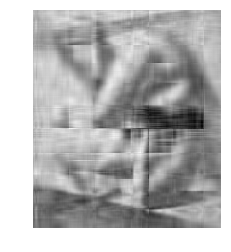

In [140]:
ipca = PCA(n_components=10).fit(img)
img_c = ipca.transform(img)
temp = ipca.inverse_transform(img_c)
plt.axis('off')
plt.imshow(temp, cmap='gray')
sys.getsizeof(img_c)

682512

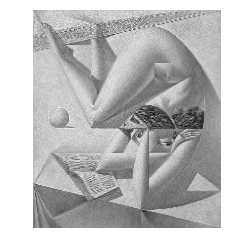

In [141]:
ipca = PCA(n_components=100).fit(img)
img_c = ipca.transform(img)
temp = ipca.inverse_transform(img_c)
plt.axis('off')
plt.imshow(temp, cmap='gray')
sys.getsizeof(img_c)

3412112

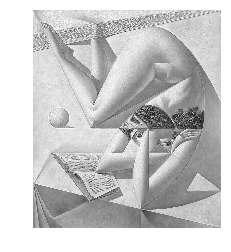

In [142]:
ipca = PCA(n_components=500).fit(img)
img_c = ipca.transform(img)
temp = ipca.inverse_transform(img_c)
plt.axis('off')
plt.imshow(temp, cmap='gray')
sys.getsizeof(img_c)

Для n_components 10, 100, 500 потребовалось 68352 bytes, 682512 bytes, 3412112 bytes соответственно. Например для n_components = 10 потребовалось в 9.98 раз меньше памяти для хранения по сравнению с n_components = 100

## PCA

Рассмотрим нелиненый датасет. Попробуем решить задачу классификации, используя представление точек, полученнуе с помощью различных версий PCA.

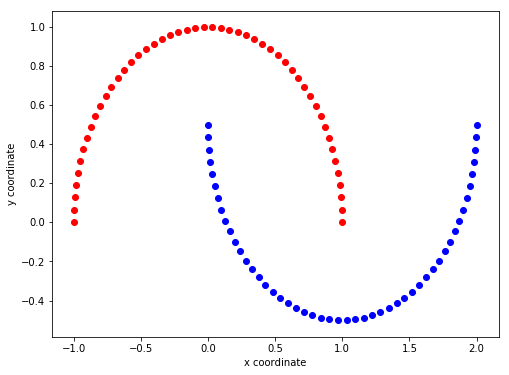

In [178]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=654)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')


plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

### Linear PCA

**7. (1 балл)** 

Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. 


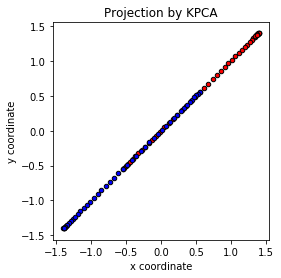

In [187]:
kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10, n_components = 1)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

plt.subplot(1, 1, 1, aspect='equal')
plt.scatter(X_kpca[y==0], X_kpca[y==0], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[y==1], X_kpca[y==1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

Выше график, полученный проекцией на одну главную компоненту

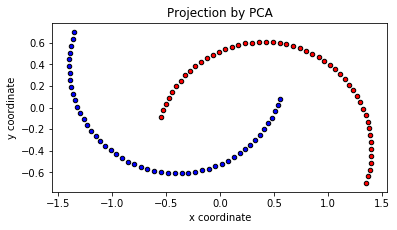

In [191]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
# Your code here
pca = KernelPCA(kernel='linear', n_components=2)
X_pca = pca.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
plt.subplot(1, 1, 1, aspect='equal')
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

Выше график, полученный проекцией на две главные компоненты

### RBF PCA

**8. (0.5 балла)** 
Допишите в месте "Your code here" построение матрицы Грамма для RBF ядра, с параметром gamma. Обратите внимание, что выше в коде уже получена матрица попарных расстояний sq_dists

In [160]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [166]:
def stepwise_kpca(X, gamma, n_components):
    """
    X: A MxN dataset as NumPy array where the samples are stored as rows (M), features as columns (N).
    gamma: coefficient for the RBF kernel.
    n_components: number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    K = np.exp(-gamma*mat_sq_dists) 

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

**9. (2 балл)**  
Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. Подберите такой параметр gamma, что выборка стала линейно разделимой.

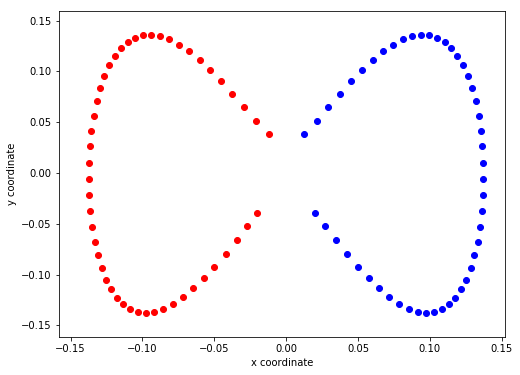

In [190]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=654)

plt.figure(figsize=(8,6))


X_4 = stepwise_kpca(X, gamma=15, n_components=2)

plt.scatter(X_4[y==0, 0], X_4[y==0, 1], color='red')
plt.scatter(X_4[y==1, 0], X_4[y==1, 1], color='blue')


plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

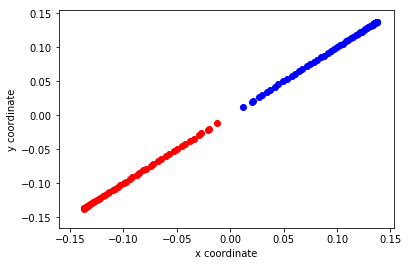

In [174]:
X_4 = stepwise_kpca(X, gamma=15, n_components=1)

plt.scatter(X_4[y==0], X_4[y==0], color='red')
plt.scatter(X_4[y==1], X_4[y==1], color='blue')


plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

### Ваши мысли о задании:

### Здесь можете поделиться картинкой

Использованные источники:
http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py
http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py
http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py
https://shankarmsy.github.io/posts/pca-sklearn.html
https://stackoverflow.com/questions/46123169/python-implementation-of-precomputed-rbf-kernel-with-gram-matrix